In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv(r"C:\Users\Abinay Rachakonda\Downloads\diamonds.csv")

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
X = df[['carat','depth','table','x','y','z']]
Y =df['price']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25,random_state = 0)

In [7]:
from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor(max_depth = 2)
classifier.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [8]:
y_test_pred = classifier.predict(X_test)

In [9]:
classifier.feature_importances_

array([0.7346767, 0.       , 0.       , 0.       , 0.2653233, 0.       ])

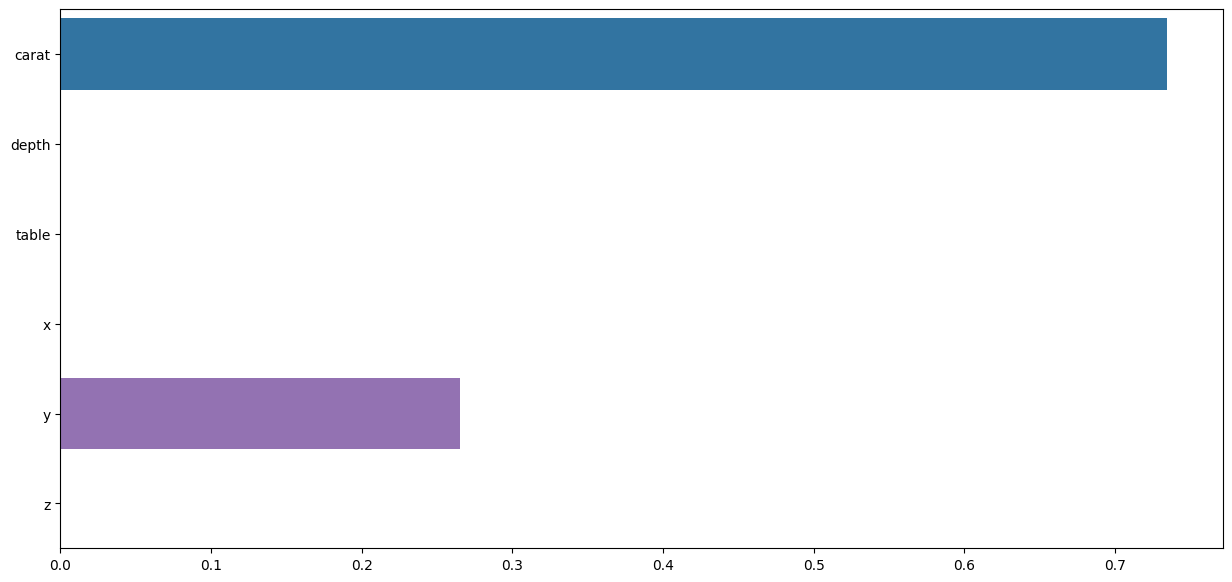

In [10]:
plt.figure(figsize=(15,7))

sns.barplot(x = classifier.feature_importances_, y = X_train.columns)

plt.show()

In [27]:
X_train_num = df[['carat','depth','table','x','y','z']]

In [19]:
X_train_cat =df[['cut','color','clarity']]

In [30]:
# Specify the order
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

# Apply Label Encoding
df['cut'] = X_train_cat['cut'].map(cut_encoder)
df['color'] = X_train_cat['color'].map(color_encoder)
df['clarity'] = X_train_cat['clarity'].map(clarity_encoder)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25,random_state = 0)

In [38]:

X_test_transformed = pd.concat([X_train_num,df[['cut','color','clarity']]], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,3.95,3.98,2.43,4,6,2
1,0.21,59.8,61.0,3.89,3.84,2.31,5,6,3
2,0.23,56.9,65.0,4.05,4.07,2.31,2,6,5
3,0.29,62.4,58.0,4.20,4.23,2.63,5,2,4
4,0.31,63.3,58.0,4.34,4.35,2.75,2,1,2


In [49]:
X_test_transformed.dtypes

carat      float64
depth      float64
table      float64
x          float64
y          float64
z          float64
cut          int64
color        int64
clarity      int64
dtype: object

In [67]:
X = X_test_transformed[['carat','depth','table','x','y','z','cut','color','clarity']]
Y =df['price']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25,random_state = 0)

In [69]:
from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor()
classifier.fit(X_train, y_train)

DecisionTreeRegressor()

In [70]:
classifier.feature_importances_

array([0.62678458, 0.00318817, 0.00274291, 0.00470762, 0.26175435,
       0.00399696, 0.00141232, 0.03178822, 0.06362487])

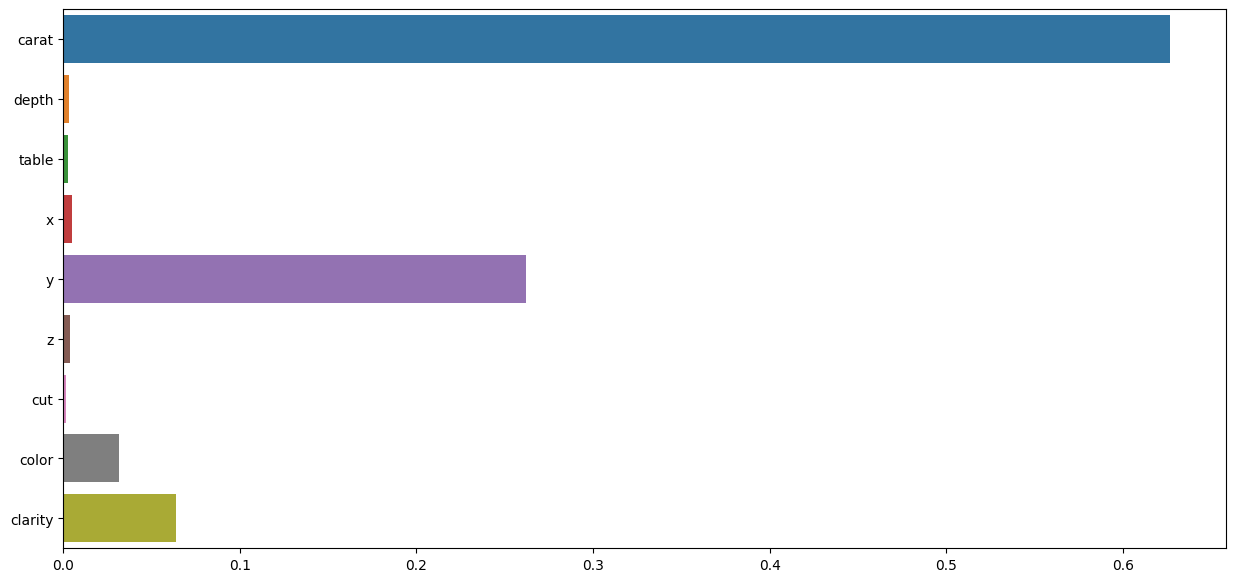

In [71]:
plt.figure(figsize=(15,7))

sns.barplot(x = classifier.feature_importances_, y = X_train.columns)

plt.show()